In [23]:
import torch
import matplotlib.pyplot as plt
from utils.config import Config
import matplotlib.gridspec as gridspec

In [26]:
results = dict()
for model in ['DLinear', 'SegRNN', 'PatchTST']:
    for training_type in ['normal', 'weighted', 'occasional']:
        if not model in results:
            results[model] = dict()
        results[model][training_type] = torch.load(f"results/results_{model}_{training_type}.pt")

In [27]:
datasets = ['ETTh1', 'ETTh2', 'ETTm1', 'ETTm2', 'electricity', 'traffic', 'weather']

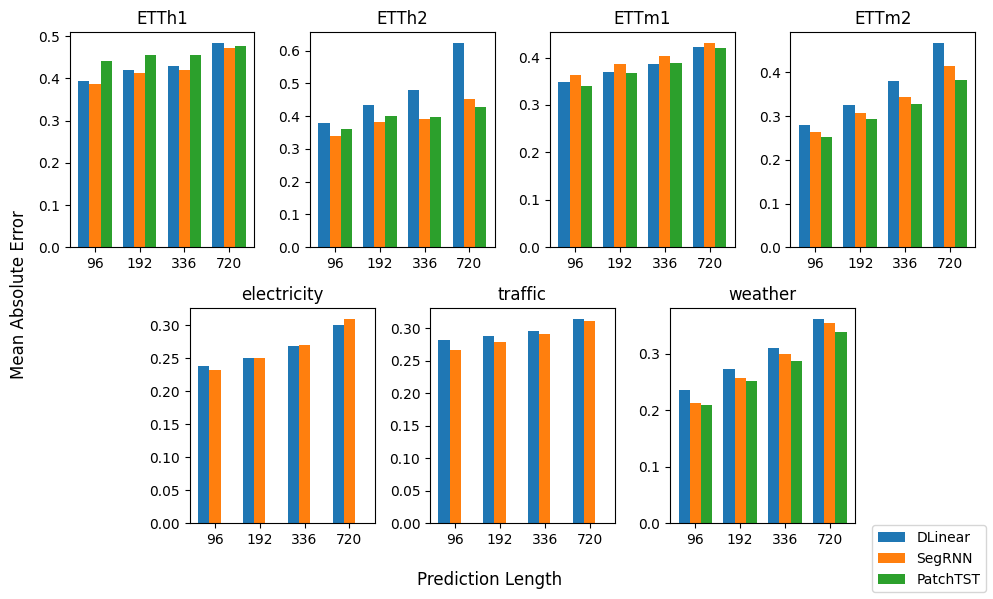

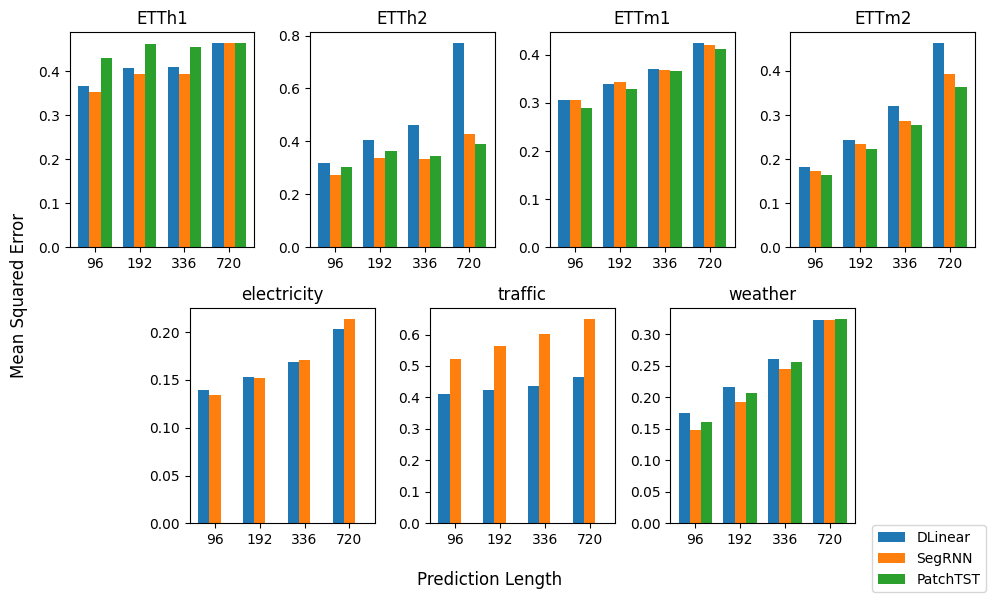

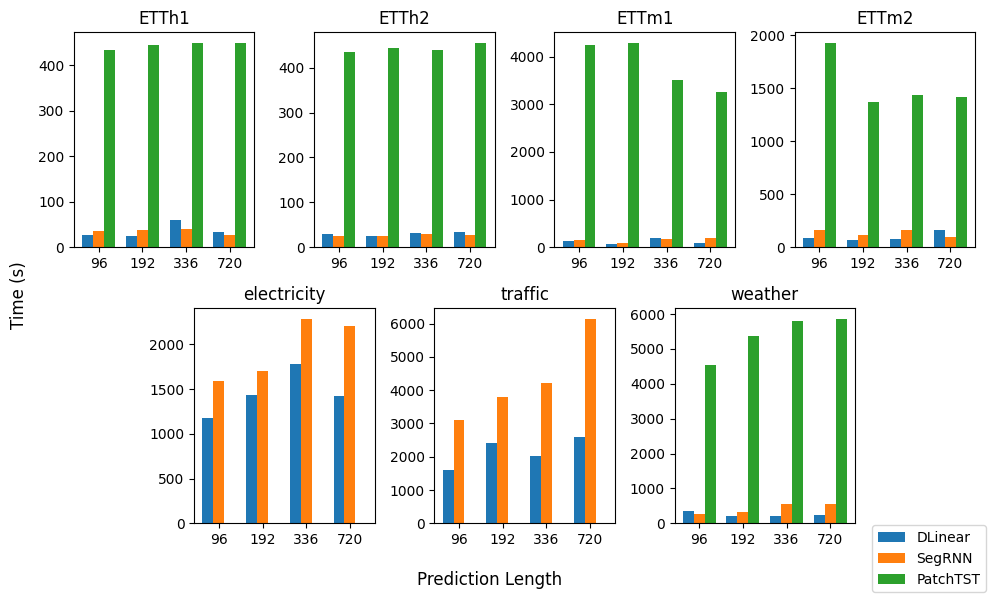

In [37]:
width = 0.25
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Time (s)']
for metric_idx, metric_name in enumerate(metrics):
    fig = plt.figure(figsize=(10, 6))
    gs = gridspec.GridSpec(2, 8)

    ax1 = fig.add_subplot(gs[0, 0:2])
    ax2 = fig.add_subplot(gs[0, 2:4])
    ax3 = fig.add_subplot(gs[0, 4:6])
    ax4 = fig.add_subplot(gs[0, 6:8])

    ax5 = fig.add_subplot(gs[1, 1:3])
    ax6 = fig.add_subplot(gs[1, 3:5])
    ax7 = fig.add_subplot(gs[1, 5:7])
    axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
    for i, ax in enumerate(axs):
        pred_lens = [96, 192, 336, 720]
        x = torch.arange(len(pred_lens))
        ax.bar(x - width, results['DLinear']['normal'][i, :, 0, metric_idx], width, label='DLinear')
        ax.bar(x, results['SegRNN']['normal'][i, :, 0, metric_idx], width, label='SegRNN')
        ax.bar(x + width, results['PatchTST']['normal'][i, :, 0, metric_idx], width, label='PatchTST')
        ax.set_xticks(x, pred_lens)
        ax.set_title( datasets[i])
    fig.supxlabel('Prediction Length')
    fig.supylabel(metric_name)
    fig.tight_layout()
    fig.legend(['DLinear', 'SegRNN', 'PatchTST'], loc='lower right')
    plt.show()